In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np

data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [49]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [50]:
# Drop unnecessary columns
data = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [51]:
# Define features (X) and target variable (y)
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [59]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.895
Precision: 0.946524064171123
Confusion Matrix:
[[181  10]
 [ 32 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       191
           1       0.95      0.85      0.89       209

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.89       400
weighted avg       0.90      0.90      0.89       400



In [60]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model.fit(X_train_scaled, y_train)
y_pred_scaled = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_scaled)
precision = precision_score(y_test, y_pred_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_scaled)
class_report = classification_report(y_test, y_pred_scaled)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9725
Precision: 0.9852941176470589
Confusion Matrix:
[[188   3]
 [  8 201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.99      0.96      0.97       209

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [61]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print(f' SVM Precision: {precision_svm}')
print('Confusion Matrix (SVM):')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)

SVM Accuracy: 0.965
Precision: 0.9802955665024631
Confusion Matrix (SVM):
[[187   4]
 [ 10 199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       191
           1       0.98      0.95      0.97       209

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Display the results
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting Precision: {precision_gb}')
print('Confusion Matrix (Gradient Boosting):')
print(conf_matrix_gb)

Gradient Boosting Accuracy: 0.9525
Gradient Boosting Precision: 0.9656862745098039
Confusion Matrix (Gradient Boosting):
[[184   7]
 [ 12 197]]


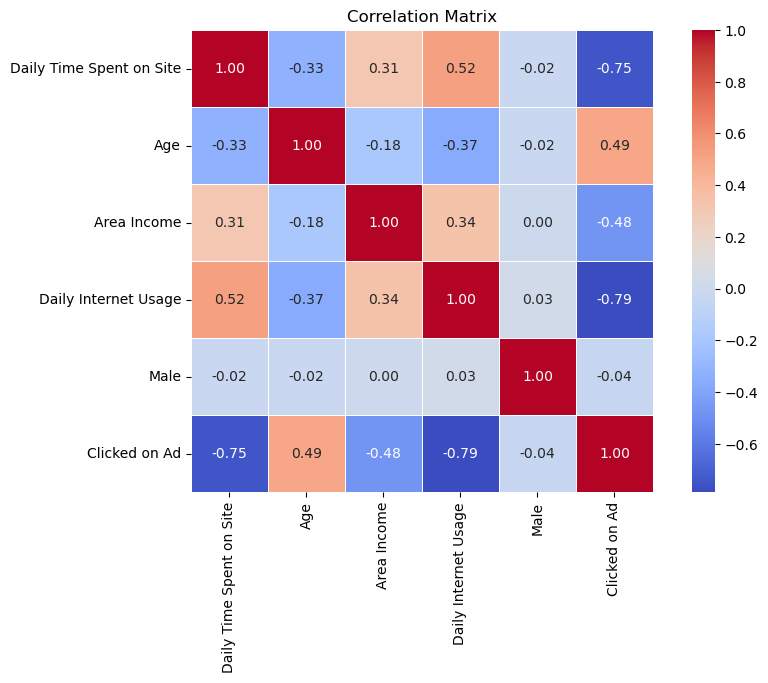

In [26]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

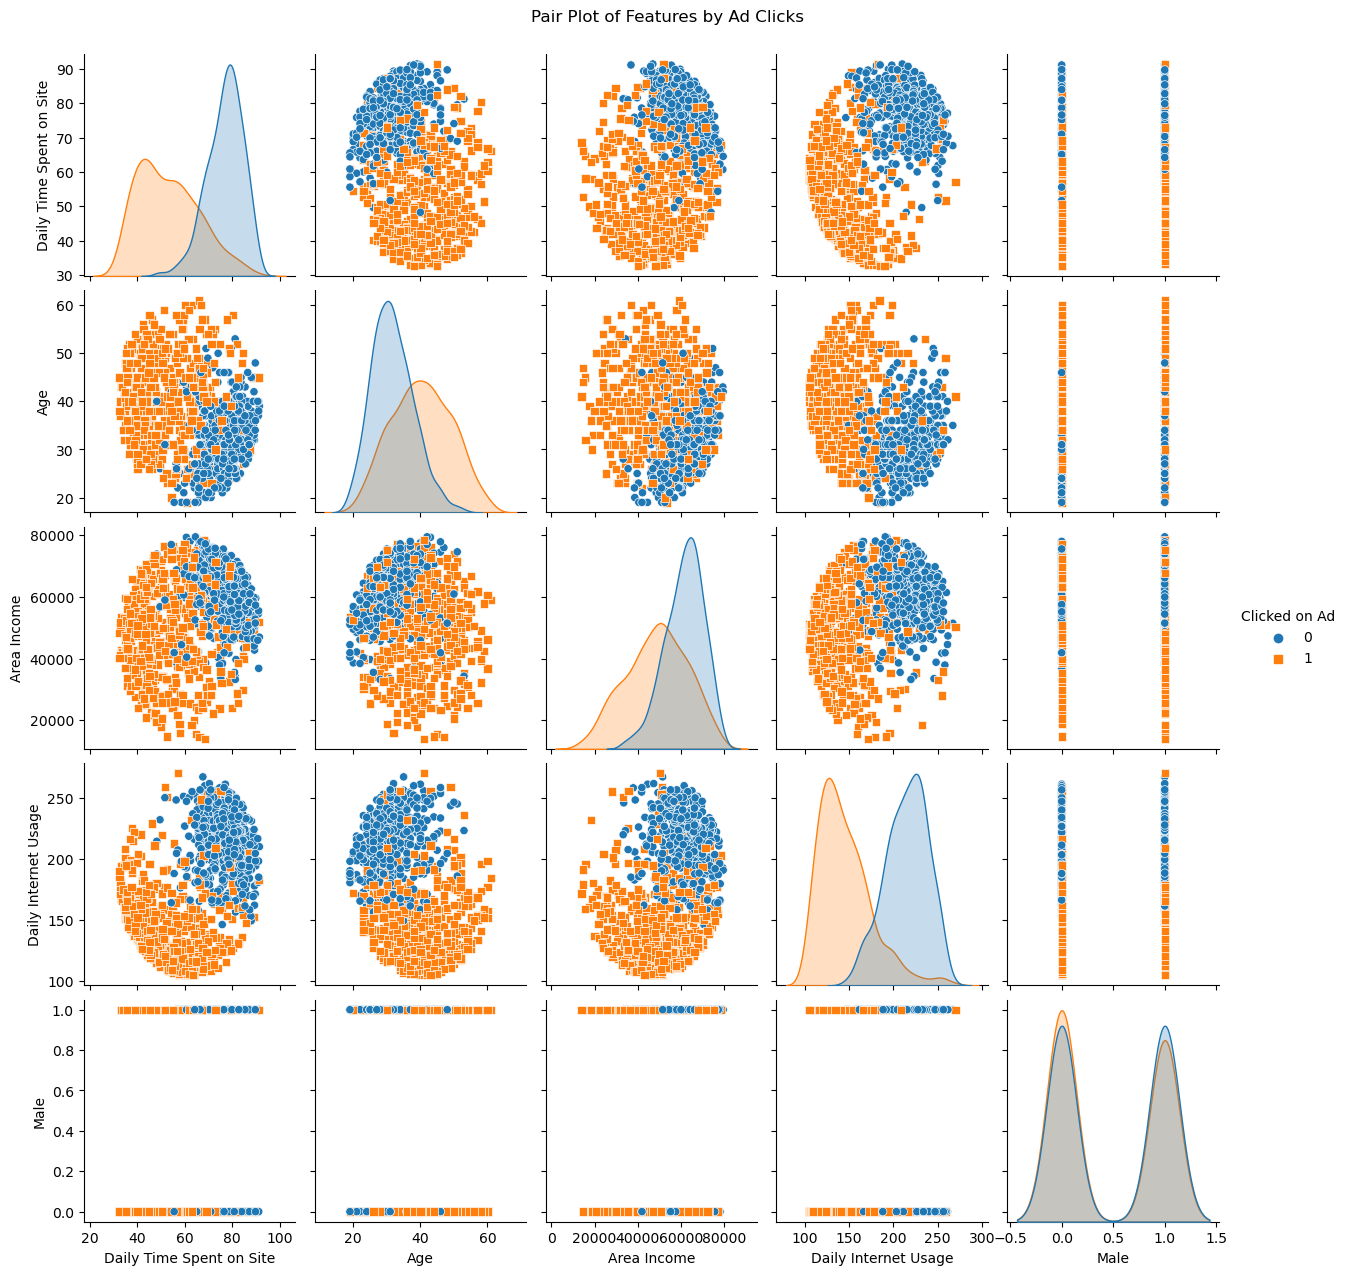

In [27]:
# Create a pair plot
sns.pairplot(data, hue='Clicked on Ad', diag_kind='kde', markers=["o", "s"])

# Title and display the plot
plt.suptitle('Pair Plot of Features by Ad Clicks', y=1.02)
plt.show()

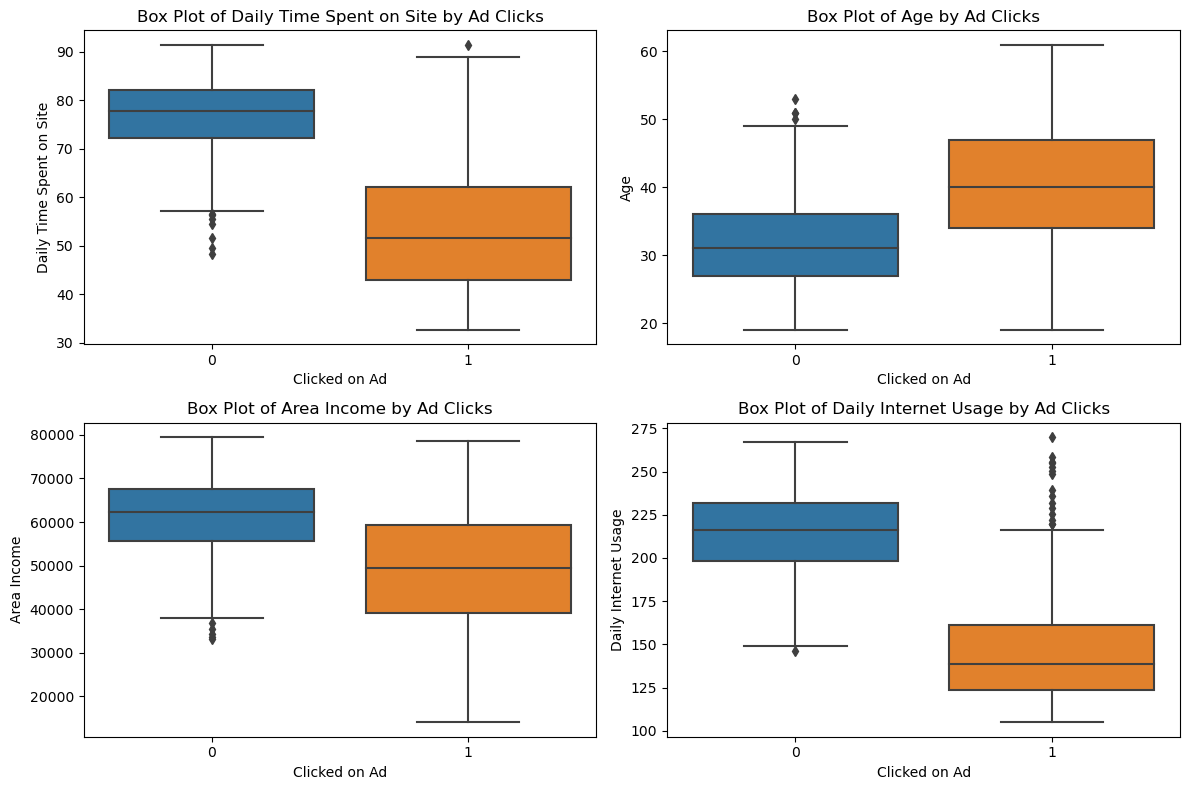

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create box plots for each numerical feature against 'Clicked on Ad'
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Clicked on Ad', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Ad Clicks')

# Display the plots
plt.tight_layout()
plt.show()


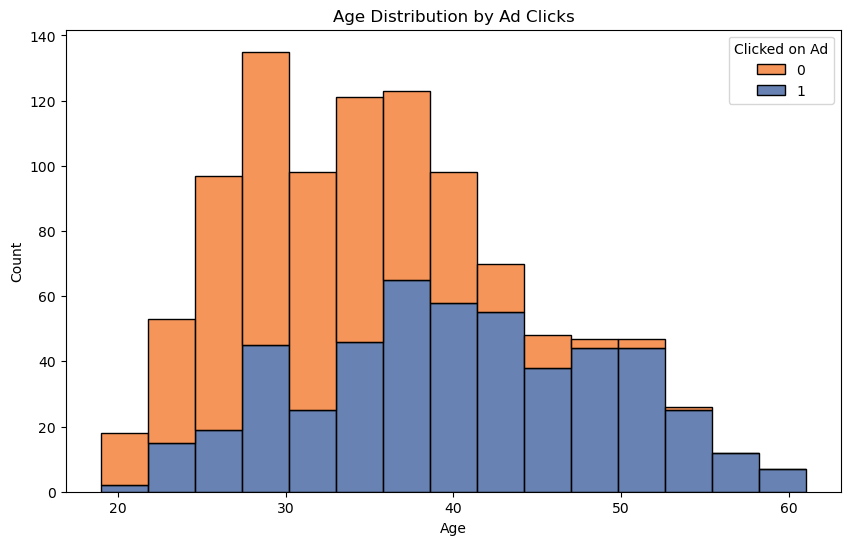

In [63]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

custom_palette = ['#f37221', '#35589a']
# Create histograms for age based on ad clicks
sns.histplot(data=data, x='Age', hue='Clicked on Ad', multiple='stack', bins=15, palette=custom_palette)

# Title and labels
plt.title('Age Distribution by Ad Clicks')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

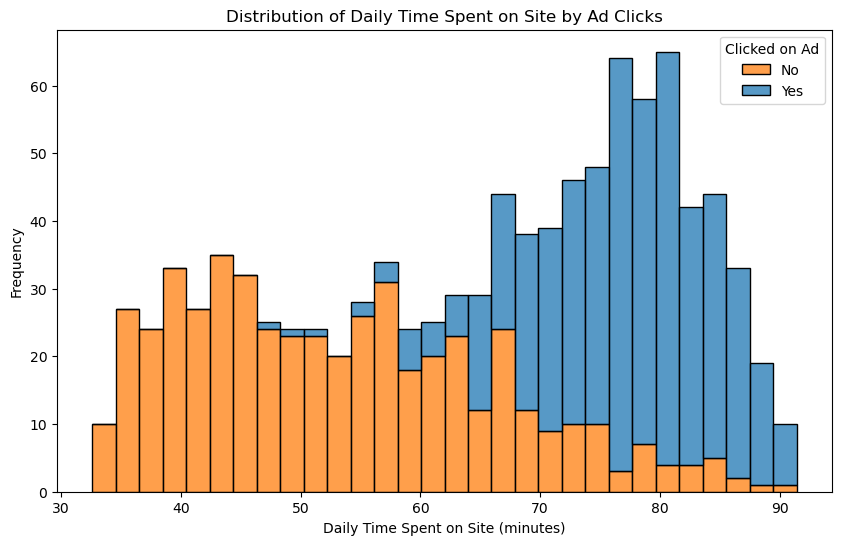

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Daily Time Spent on Site', hue='Clicked on Ad', bins=30, multiple='stack')

# Adding title and labels for clarity
plt.title('Distribution of Daily Time Spent on Site by Ad Clicks')
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Clicked on Ad', labels=['No', 'Yes'])
plt.show()


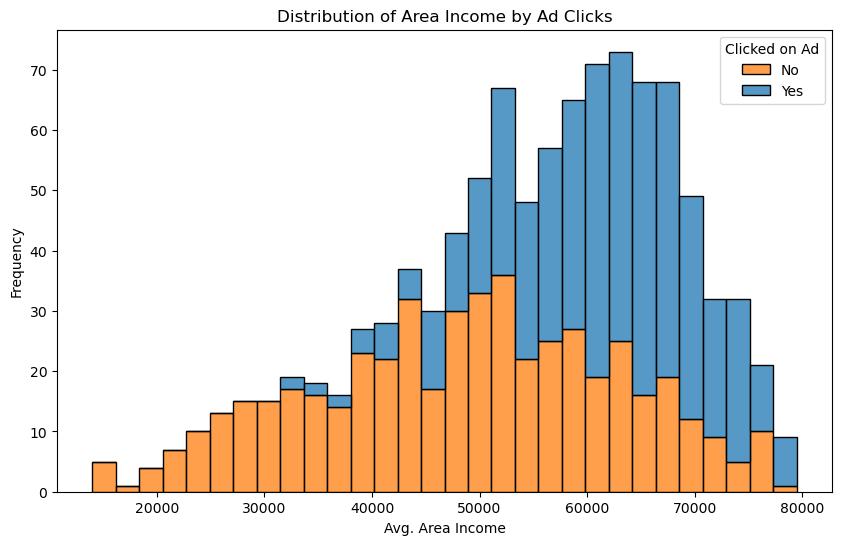

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Area Income', hue='Clicked on Ad', bins=30, multiple='stack')

# Adding title and labels for clarity
plt.title('Distribution of Area Income by Ad Clicks')
plt.xlabel('Avg. Area Income')
plt.ylabel('Frequency')
plt.legend(title='Clicked on Ad', labels=['No', 'Yes'])
plt.show()

In [16]:
# Extracting coefficients from the Logistic Regression model
coefficients = pd.DataFrame(log_model.coef_.T, columns=['Coefficient'], index=X.columns)
print(coefficients.sort_values(by='Coefficient', ascending=False))

                          Coefficient
Age                          1.127292
Male                        -0.262184
Area Income                 -1.590978
Daily Time Spent on Site    -2.443943
Daily Internet Usage        -2.467631


In [36]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_[0]

# Calculate Odds Ratios
odds_ratios = np.exp(coefficients)

# Create a dataframe to display the variables alongside the odds ratios
feature_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
odds_ratios_df = pd.DataFrame({'Feature': feature_names, 'Odds Ratio': odds_ratios})

print(odds_ratios_df)


                    Feature  Odds Ratio
0  Daily Time Spent on Site    0.939854
1                       Age    1.301788
2               Area Income    0.999984
3      Daily Internet Usage    0.976033
4                      Male    1.001782
